In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lab_data.csv')

In [3]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


- Decision Tree is baed on (CART) which is advancement of ID3
- ID3 works when features data and target data both are categorical in nature
- C4.5 is an advancement of ID3, it converts categorical features into categorical features, then proceeds with ID3
- CART is based on C4.5, with slight advancement of 'target can be continues'
- sckikit-learn decision trees are based on CART

#### Criteria of creating Decision Tree
1. Entory
2. Gini Impurity

In [5]:
df.Play.value_counts()

yes    9
no     5
Name: Play, dtype: int64

In [7]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)
Entropy_Play

0.9402859586706311

In [9]:
df[df.Outlook == 'sunny']

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [14]:
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)
Entropy_Play_Outlook_Sunny 

0.9709505944546686

In [11]:
df[df.Outlook == 'overcast']

,Outlook,Temperature,Humidity,Windy,Play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [12]:
df[df.Outlook == 'rainy']

,Outlook,Temperature,Humidity,Windy,Play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [15]:
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)
Entropy_Play_Outlook_Rain

0.9709505944546686

In [17]:
# So, splitting by attribute 'Outlook', gives IG as:
Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain 

0.24674981977443933

## Lets do this on iris_dataset

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [24]:
iris = load_iris()
print(iris.data[:5])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [25]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [26]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target)

In [29]:
clf.fit(trainX,trainY)

export_graphviz(clf,'dt.tree')

#### Feature Importance
- Important features will be higher up the tree
- We can use this techniques to identify important features

In [31]:
clf.feature_importances_

array([0.        , 0.03659621, 0.08653797, 0.87686581])

In [32]:
# Visualizing the Decision Boundry

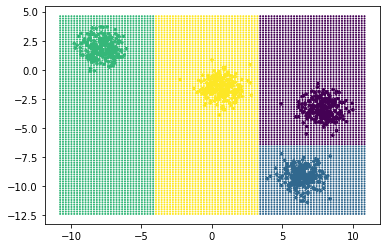

In [34]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

dt = DecisionTreeClassifier()
dt.fit(X,Y)

plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()